In [1]:
import pandas as pd
import os

# Files are uploaded in the /content directory in Google Colab
data_path = "/content"

# Create a list of all the filenames to be merged
filenames = [f"vol{i}.csv" for i in range(1, 16)]

# Read and combine all files
df_list = [pd.read_csv(os.path.join(data_path, file)) for file in filenames]
merged_df = pd.concat(df_list, ignore_index=True)

# Save the final merged dataset
merged_df.to_csv("merged_authentech_dataset.csv", index=False)

# Display some rows to confirm
print("✅ Merged dataset created!")
print(merged_df.head())





✅ Merged dataset created!
   Timestamp    X     Y BTN_TOUCH  TOUCH_MAJOR  TOUCH_MINOR  TRACKING_ID  \
0   0.000000  350  1404      DOWN           11         -420         2526   
1   0.032676  348  1406      HELD           11         -420         2526   
2   0.042109  347  1408      HELD           11         -420         2526   
3   0.049881  344  1411      HELD           11         -420         2526   
4   0.058581  340  1416      HELD           11         -420         2526   

   PRESSURE  FINGER  
0        38       0  
1        38       0  
2        38       0  
3        38       0  
4        38       0  


In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler

# Directory where files are stored
data_path = "/content"

# List of CSV files (vol1.csv to vol15.csv)
filenames = [f"vol{i}.csv" for i in range(1, 16)]

# Read and combine all CSV files
df_list = [pd.read_csv(os.path.join(data_path, file)) for file in filenames]
merged_df = pd.concat(df_list, ignore_index=True)



print("✅ All files merged successfully!")
print(f"Merged dataset shape: {merged_df.shape}")

# Step 1: Display column names
print("\nColumns in the dataset:")
print(merged_df.columns)

# Step 2: Select numeric columns for scaling
numeric_features = merged_df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric features to be scaled:")
print(numeric_features)

# Step 3: Apply MinMaxScaler only if numeric columns exist
if numeric_features:
    scaler = MinMaxScaler()
    merged_df[numeric_features] = scaler.fit_transform(merged_df[numeric_features])
    print("✅ Numeric features normalized!")
else:
    print("⚠️ No numeric features found to scale.")

# Step 4: Save the final merged and processed dataset
output_file = "merged_authentech_dataset.csv"
merged_df.to_csv(output_file, index=False)
print(f"\n✅ Merged and processed dataset saved as '{output_file}'")

# Step 5: Display a preview of the processed dataset
print("\nSample rows from the merged dataset:")
print(merged_df.head())



✅ All files merged successfully!
Merged dataset shape: (769032, 9)

Columns in the dataset:
Index(['Timestamp', 'X', 'Y', 'BTN_TOUCH', 'TOUCH_MAJOR', 'TOUCH_MINOR',
       'TRACKING_ID', 'PRESSURE', 'FINGER'],
      dtype='object')

Numeric features to be scaled:
['Timestamp', 'X', 'Y', 'TOUCH_MAJOR', 'TOUCH_MINOR', 'TRACKING_ID', 'PRESSURE', 'FINGER']
✅ Numeric features normalized!

✅ Merged and processed dataset saved as 'merged_authentech_dataset.csv'

Sample rows from the merged dataset:
   Timestamp         X         Y BTN_TOUCH  TOUCH_MAJOR  TOUCH_MINOR  \
0   0.000000  0.477964  0.779820      DOWN     0.990805          0.0   
1   0.000036  0.476723  0.780676      HELD     0.990805          0.0   
2   0.000047  0.476102  0.781531      HELD     0.990805          0.0   
3   0.000055  0.474240  0.782813      HELD     0.990805          0.0   
4   0.000065  0.471757  0.784951      HELD     0.990805          0.0   

    TRACKING_ID  PRESSURE  FINGER  
0  6.859190e-07  0.678519     0.0 

In [3]:
# Read and combine all CSV files
df_list = [pd.read_csv(os.path.join(data_path, file)) for file in filenames]
merged_df = pd.concat(df_list, ignore_index=True)

# 🔥 Drop any rows with missing values
merged_df.dropna(inplace=True)
print("✅ Null values dropped!")
print(f"Cleaned dataset shape: {merged_df.shape}")



✅ Null values dropped!
Cleaned dataset shape: (767314, 9)


Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.4991 - auc: 0.5479 - loss: 1.5592 - val_accuracy: 0.5217 - val_auc: 0.5476 - val_loss: 0.6922 - learning_rate: 0.0010
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5068 - auc: 0.5317 - loss: 1.0413 - val_accuracy: 0.5217 - val_auc: 0.5000 - val_loss: 0.6919 - learning_rate: 0.0010
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5114 - auc: 0.5190 - loss: 0.8857 - val_accuracy: 0.5217 - val_auc: 0.5795 - val_loss: 0.6911 - learning_rate: 0.0010
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5001 - auc: 0.5283 - loss: 0.8138 - val_accuracy: 0.5217 - val_auc: 0.5779 - val_loss: 0.6901 - learning_rate: 0.0010
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5159 - auc: 0.5554 - loss: 0.7492 - val_accuracy: 0.5250 - val_auc: 0.6628 - val_loss: 0.6863 - learning_rate: 0.0010
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4963 - auc: 0.5228 -

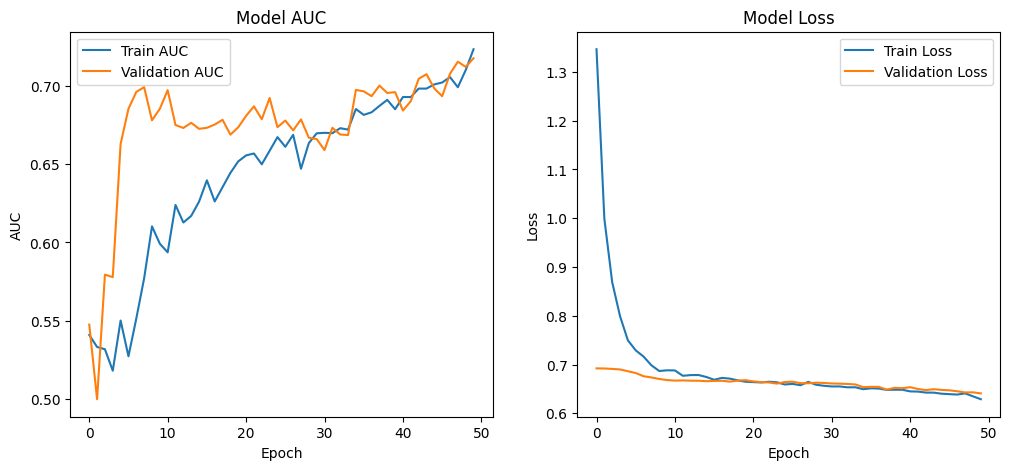

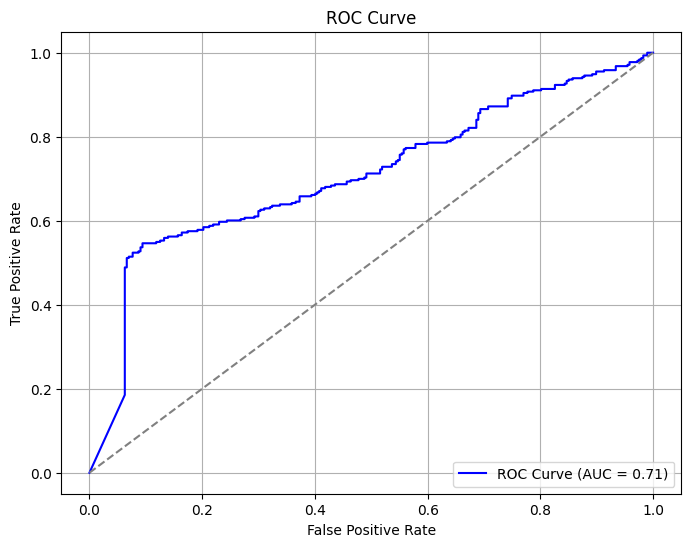


💾 Model saved as 'siamese_lstm_authentech.h5'


In [12]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt
from collections import defaultdict
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Lambda, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ====================== DATA LOADING ======================
df = pd.read_csv("/content/merged_authentech_dataset.csv")
df.columns = df.columns.str.strip()

# ====================== COLUMN MAPPING ======================
column_mapping = {
    'x': 'X',
    'y': 'Y',
    'touch_major': 'TOUCH_MAJOR',
    'touch_minor': 'TOUCH_MINOR',
    'timestamp': 'Timestamp'
}
df = df.rename(columns={k: v for k, v in column_mapping.items() if k.lower() in (col.lower() for col in df.columns)})
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Gesture_time_diff'] = df['Timestamp'].diff().dt.total_seconds().fillna(0)

numeric_cols = ['X', 'Y', 'TOUCH_MAJOR', 'TOUCH_MINOR', 'Gesture_time_diff']
df.dropna(inplace=True)

scaling_strategy = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    percentage = (len(outliers) / len(df)) * 100
    scaling_strategy[col] = RobustScaler() if percentage > 5 else MinMaxScaler()

for col, scaler in scaling_strategy.items():
    df[[col]] = scaler.fit_transform(df[[col]])

# ====================== PAIR GENERATION ======================
data = df[numeric_cols].values
group_size = 5
num_users = len(data) // group_size
labels = np.repeat(np.arange(num_users), group_size)
remaining = len(data) - len(labels)
if remaining > 0:
    labels = np.concatenate([labels, np.full(remaining, num_users)])

rng = np.random.default_rng(42)
label_to_indices = defaultdict(list)
for idx, label in enumerate(labels):
    label_to_indices[label].append(idx)

positive_pairs, negative_pairs = [], []
n_pairs = 1500
while len(positive_pairs) < n_pairs:
    u = rng.choice(list(label_to_indices.keys()))
    if len(label_to_indices[u]) >= 2:
        a, b = rng.choice(label_to_indices[u], 2, replace=False)
        positive_pairs.append([data[a], data[b]])
while len(negative_pairs) < n_pairs:
    u1, u2 = rng.choice(list(label_to_indices.keys()), 2, replace=False)
    a = rng.choice(label_to_indices[u1])
    b = rng.choice(label_to_indices[u2])
    negative_pairs.append([data[a], data[b]])

pairs = np.array(positive_pairs + negative_pairs)
pair_labels = np.array([1] * len(positive_pairs) + [0] * len(negative_pairs))

left = np.expand_dims(pairs[:, 0], axis=2)
right = np.expand_dims(pairs[:, 1], axis=2)

X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(
    left, right, pair_labels, test_size=0.2, random_state=42
)

# ====================== LSTM MODEL ======================
def create_base_network(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(128, return_sequences=True)(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = LSTM(64)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    return Model(inputs, x)

input_shape = (left.shape[1], 1)
base_network = create_base_network(input_shape)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

processed_a = base_network(input_a)
processed_b = base_network(input_b)

def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.maximum(K.sum(K.square(x - y), axis=1, keepdims=True), K.epsilon()))

distance = Lambda(euclidean_distance)([processed_a, processed_b])
output = Dense(1, activation='sigmoid')(distance)
model = Model([input_a, input_b], output)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
]

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# ====================== TRAIN ======================
history = model.fit(
    [X1_train, X2_train], y_train,
    validation_data=([X1_test, X2_test], y_test),
    epochs=50,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

# ====================== EVALUATE ======================
y_pred = model.predict([X1_test, X2_test]).flatten()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Manual threshold
manual_threshold = 0.60
y_pred_class = (y_pred >= manual_threshold).astype(int)

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_class, target_names=['Non-Match', 'Match']))
print(f"\n✅ Accuracy: {np.mean(y_pred_class == y_test):.4f}")
print(f"✅ AUC: {roc_auc:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Model AUC')
plt.xlabel('Epoch'); plt.ylabel('AUC')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

model.save('siamese_lstm_authentech.h5')
print("\n💾 Model saved as 'siamese_lstm_authentech.h5'")


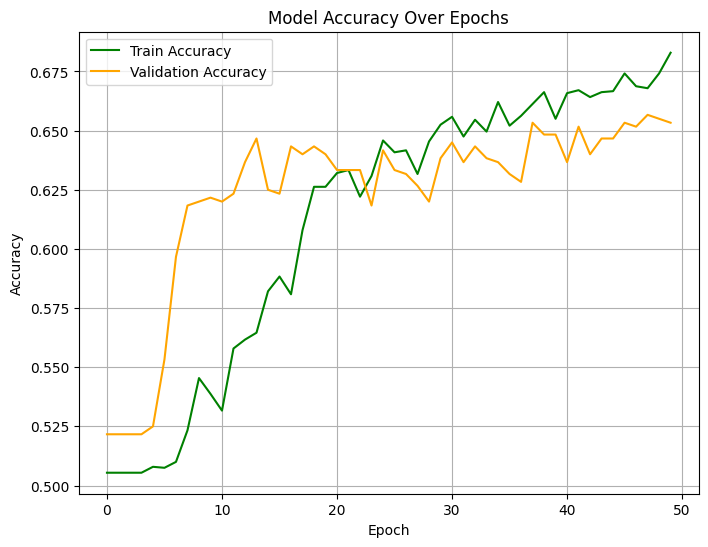

In [16]:
# ====================== ACCURACY CURVE ======================
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
history = model.fit(
    [X1_train, X2_train], y_train,
    validation_data=([X1_test, X2_test], y_test),
    epochs=3,
    batch_size=32
)



Epoch 1/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.4863 - auc: 0.4721 - loss: 1.3782 - val_accuracy: 0.4000 - val_auc: 0.3366 - val_loss: 0.7022
Epoch 2/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4908 - auc: 0.4935 - loss: 1.1427 - val_accuracy: 0.4133 - val_auc: 0.3440 - val_loss: 0.7055
Epoch 3/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.5009 - auc: 0.4818 - loss: 1.0058 - val_accuracy: 0.4133 - val_auc: 0.3391 - val_loss: 0.7089


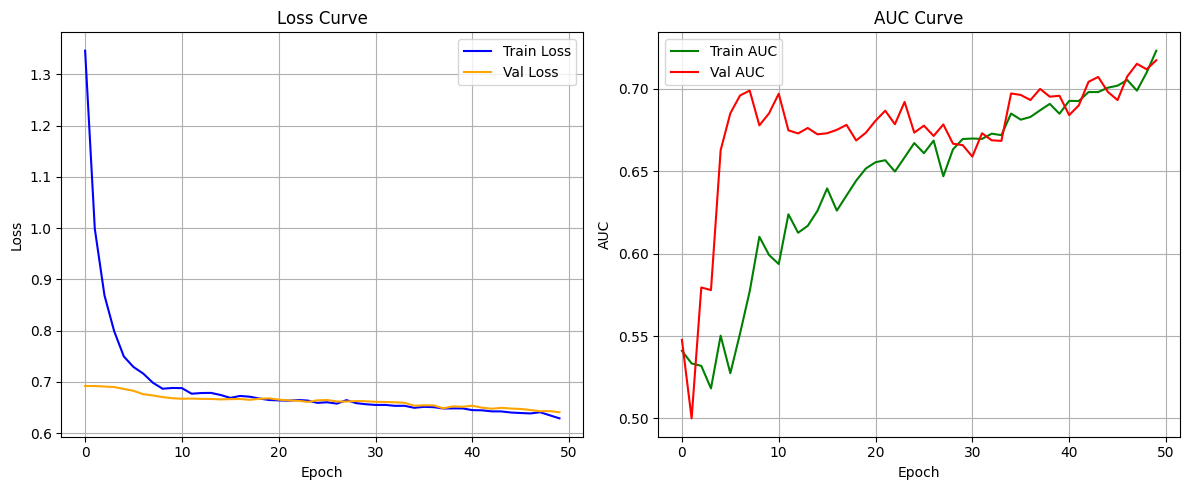

In [15]:
# 📉 Loss and AUC Curves
plt.figure(figsize=(12, 5))

# 🔵 Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 🟢 AUC Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Train AUC', color='green')
plt.plot(history.history['val_auc'], label='Val AUC', color='red')
plt.title('AUC Curve')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



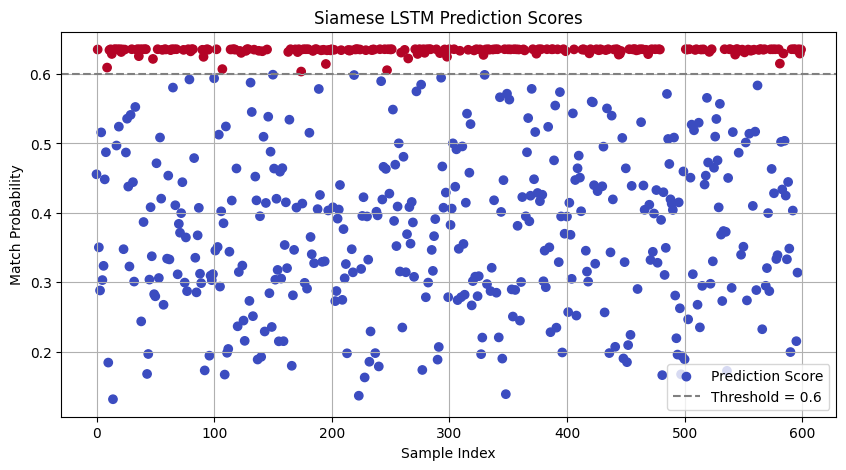


🎯 Matches ABOVE threshold (0.6):
✅ Pair #1: Score = 0.64 | Label = 1
✅ Pair #9: Score = 0.61 | Label = 0
✅ Pair #11: Score = 0.63 | Label = 1
✅ Pair #12: Score = 0.64 | Label = 1
✅ Pair #13: Score = 0.63 | Label = 0
✅ Pair #15: Score = 0.64 | Label = 1
✅ Pair #16: Score = 0.64 | Label = 1
✅ Pair #18: Score = 0.64 | Label = 0
✅ Pair #20: Score = 0.64 | Label = 1
✅ Pair #21: Score = 0.63 | Label = 1

❌ Non-matches BELOW threshold (0.6):
❌ Pair #0: Score = 0.46 | Label = 0
❌ Pair #2: Score = 0.35 | Label = 0
❌ Pair #3: Score = 0.29 | Label = 1
❌ Pair #4: Score = 0.52 | Label = 0
❌ Pair #5: Score = 0.30 | Label = 1
❌ Pair #6: Score = 0.32 | Label = 1
❌ Pair #7: Score = 0.45 | Label = 0
❌ Pair #8: Score = 0.49 | Label = 1
❌ Pair #10: Score = 0.18 | Label = 0
❌ Pair #14: Score = 0.13 | Label = 0

📈 Total above threshold: 214
📉 Total below threshold: 386


In [14]:
# 🎯 Scatter Plot of Predictions with Respect to Threshold
threshold = 0.60  # Changeable: 0.60 to 0.65 or 0.69 based on your testing
above_thresh = y_pred >= threshold
below_thresh = ~above_thresh

plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_pred)), y_pred, c=above_thresh, cmap='coolwarm', label='Prediction Score')
plt.axhline(threshold, color='gray', linestyle='--', label=f'Threshold = {threshold}')
plt.title('Siamese LSTM Prediction Scores')
plt.xlabel('Sample Index')
plt.ylabel('Match Probability')
plt.legend()
plt.grid(True)
plt.show()

# 🧾 Display Sample Predictions
print(f"\n🎯 Matches ABOVE threshold ({threshold}):")
count_above = np.sum(above_thresh)
for idx in np.where(above_thresh)[0][:10]:  # Show first 10 only
    print(f"✅ Pair #{idx}: Score = {y_pred[idx]:.2f} | Label = {y_test[idx]}")

print(f"\n❌ Non-matches BELOW threshold ({threshold}):")
count_below = np.sum(below_thresh)
for idx in np.where(below_thresh)[0][:10]:
    print(f"❌ Pair #{idx}: Score = {y_pred[idx]:.2f} | Label = {y_test[idx]}")

print(f"\n📈 Total above threshold: {count_above}")
print(f"📉 Total below threshold: {count_below}")


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Apply threshold
manual_threshold = 0.60  # Or any value you'd like
y_pred_class = (y_pred >= manual_threshold).astype(int)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class, zero_division=0)
recall = recall_score(y_test, y_pred_class, zero_division=0)
f1 = f1_score(y_test, y_pred_class, zero_division=0)

# Print nicely
print("\n📊 Final Evaluation Metrics (Threshold = {:.2f}):".format(manual_threshold))
print(f"✅ Accuracy  : {accuracy:.4f}")
print(f"🎯 Precision : {precision:.4f}")
print(f"📌 Recall    : {recall:.4f}")
print(f"🏅 F1 Score  : {f1:.4f}")



📊 Final Evaluation Metrics (Threshold = 0.60):
✅ Accuracy  : 0.7050
🎯 Precision : 0.8178
📌 Recall    : 0.5591
🏅 F1 Score  : 0.6641
